<a href="https://colab.research.google.com/github/vent0906/ww/blob/main/self_learn_networkx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



1. Create a Simple Undirected Graph  
2. Check Graph Directionality (`is_directed`)  
3. Create a Directed Graph  
4. Use the Built-in Karate Club Graph  
5. Calculate Average Degree of a Graph  
6. Calculate Average Clustering Coefficient  
7. Compute Closeness Centrality (Manual and NetworkX)  
8. Create a Bipartite Graph  
9. Generate Adjacency Matrix  
10. Generate Incidence Matrix  
11. Compute Laplacian Matrix (Unnormalized and Normalized)  


In [ ]:

# Import required libraries
import networkx as nx
import matplotlib.pyplot as plt



To use the graph manipulation and visualization capabilities provided by NetworkX and Matplotlib.

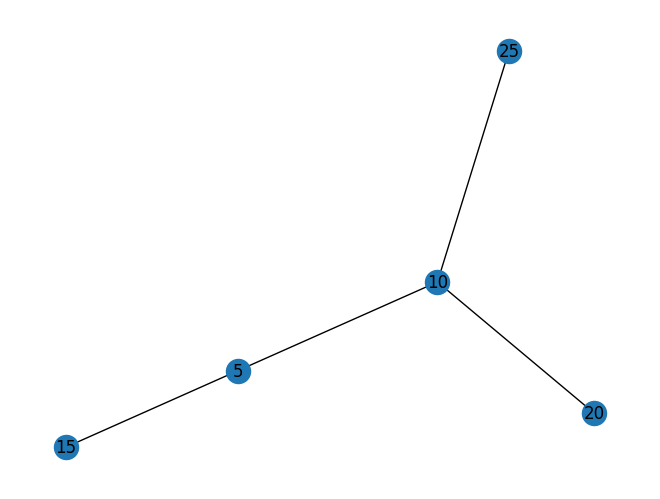

In [ ]:

# Initialize an undirected graph
basic_graph = nx.Graph()

# Add individual nodes
basic_graph.add_node(10)
basic_graph.add_node(20)

# Add edges (nodes will be auto-created if missing)
basic_graph.add_edge(10, 20)
basic_graph.add_edge(5, 15)
basic_graph.add_edge(5, 10)
basic_graph.add_edge(10, 25)

# Draw the graph
nx.draw(basic_graph, with_labels=True)
plt.show()



We created a simple undirected graph, added nodes and edges. NetworkX automatically adds any missing nodes.
This allows rapid prototyping of graph structures.


In [ ]:

# Default graph is undirected
undirected = nx.Graph()
print("Is undirected?", undirected.is_directed())

# Create a directed graph
directed = nx.DiGraph()
print("Is directed?", directed.is_directed())


Is undirected? False
Is directed? True



We demonstrated the difference between undirected and directed graphs.
The is_directed() method helps distinguish between the two.


Graph type: <class 'networkx.classes.graph.Graph'>


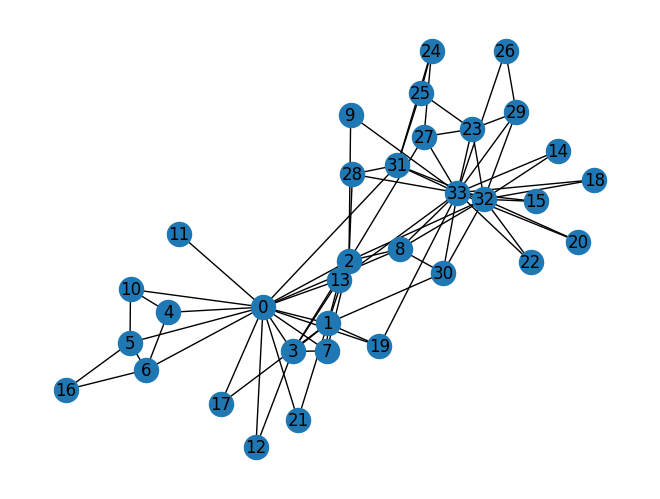

In [ ]:

# Load the built-in karate club graph
club_network = nx.karate_club_graph()

# Display type and visualize
print("Graph type:", type(club_network))
nx.draw(club_network, with_labels=True)
plt.show()



The Karate Club graph contains social interactions between 34 members.
It's often used as a standard benchmark in social network analysis.


In [ ]:

# Calculate average degree of a graph
def get_avg_degree(total_edges, total_nodes):
    # Degree formula: 2 * number of edges / number of nodes
    degree = 2 * total_edges / total_nodes
    return int(round(degree))

edge_count = club_network.number_of_edges()
node_count = club_network.number_of_nodes()
avg_deg = get_avg_degree(edge_count, node_count)

print("Average degree of karate club network is:", avg_deg)


Average degree of karate club network is: 5



The average degree of a graph is a key indicator of its connectivity.
For undirected graphs: average degree = 2 * edges / nodes.


In [ ]:

# Calculate average clustering coefficient
def get_avg_clustering(graph_obj):
    coefficient = nx.average_clustering(graph_obj)
    return round(coefficient, 2)

clustering_result = get_avg_clustering(club_network)
print("Average clustering coefficient:", clustering_result)


Average clustering coefficient: 0.57



Clustering coefficient measures how likely neighbors of a node are connected.
High clustering implies tight-knit communities.


In [ ]:

# Compute unnormalized closeness centrality
def raw_closeness(graph_obj, selected_node=5):
    total_dist = 0
    for path in list(nx.single_source_shortest_path(graph_obj, selected_node).values())[1:]:
        total_dist += len(path) - 1
    closeness = 1 / total_dist
    return round(closeness, 2)

manual_closeness = raw_closeness(club_network)
print("Raw closeness centrality of node 5:", manual_closeness)

# Using NetworkX's normalized version
normalized_closeness = nx.closeness_centrality(club_network, 5)
print("Normalized closeness centrality of node 5:", round(normalized_closeness, 2))


Raw closeness centrality of node 5: 0.01
Normalized closeness centrality of node 5: 0.38



Closeness centrality shows how fast information spreads from a node to others.
We computed both raw and normalized values.


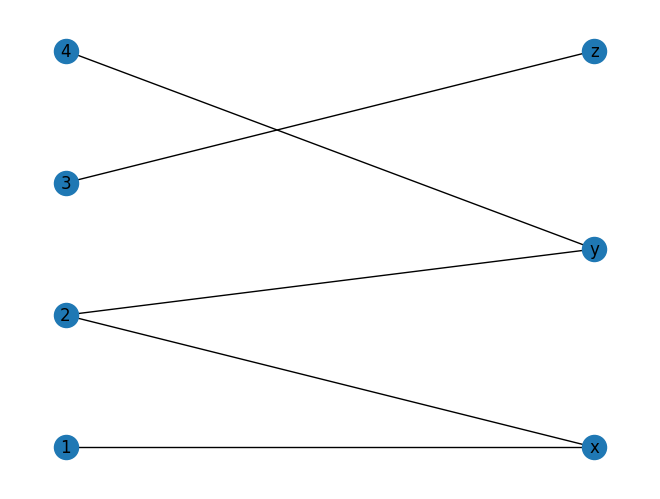

In [ ]:

from networkx.algorithms import bipartite

# Create a bipartite graph
bipart_graph = nx.Graph()

# Add nodes with bipartite attributes
bipart_graph.add_nodes_from([1, 2, 3, 4], bipartite=0)
bipart_graph.add_nodes_from(['x', 'y', 'z'], bipartite=1)

# Connect nodes across partitions
bipart_graph.add_edges_from([(1, 'x'), (2, 'x'), (2, 'y'), (3, 'z'), (4, 'y')])

# Draw the bipartite graph
pos = nx.bipartite_layout(bipart_graph, nodes=[1,2,3,4])
nx.draw(bipart_graph, pos, with_labels=True)
plt.show()



Bipartite graphs consist of two disjoint sets of nodes where connections only occur across sets.
They're common in recommender systems (e.g., user-item graphs).


In [ ]:

# Generate and display the adjacency matrix
adj_matrix = nx.adjacency_matrix(club_network).todense()
print("Adjacency Matrix of the Karate Club Graph:")
print(adj_matrix)


Adjacency Matrix of the Karate Club Graph:
[[0 4 5 ... 2 0 0]
 [4 0 6 ... 0 0 0]
 [5 6 0 ... 0 2 0]
 ...
 [2 0 0 ... 0 4 4]
 [0 0 2 ... 4 0 5]
 [0 0 0 ... 4 5 0]]



The adjacency matrix represents direct connections between nodes.
This matrix is symmetric for undirected graphs and is crucial for mathematical operations in graph neural networks.


In [ ]:

# Generate and display the incidence matrix
inc_matrix = nx.incidence_matrix(club_network).todense()
print("Incidence Matrix of the Karate Club Graph:")
print(inc_matrix)


Incidence Matrix of the Karate Club Graph:
[[1. 1. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 1. 0.]
 [0. 0. 0. ... 1. 0. 1.]
 [0. 0. 0. ... 0. 1. 1.]]



The incidence matrix describes the relationship between nodes and edges.
It’s useful in certain flow and connectivity problems.


In [ ]:

# Compute and print the standard Laplacian matrix
lap_matrix = nx.laplacian_matrix(club_network).todense()
print("Laplacian Matrix of the Karate Club Graph:")
print(lap_matrix)

# Compute and print the symmetric normalized Laplacian matrix
norm_lap_matrix = nx.normalized_laplacian_matrix(club_network).todense()
print("\nSymmetric Normalized Laplacian Matrix:")
print(norm_lap_matrix)


Laplacian Matrix of the Karate Club Graph:
[[42 -4 -5 ... -2  0  0]
 [-4 29 -6 ...  0  0  0]
 [-5 -6 33 ...  0 -2  0]
 ...
 [-2  0  0 ... 21 -4 -4]
 [ 0  0 -2 ... -4 38 -5]
 [ 0  0  0 ... -4 -5 48]]

Symmetric Normalized Laplacian Matrix:
[[ 1.         -0.11461365 -0.13430383 ... -0.0673435   0.
   0.        ]
 [-0.11461365  1.         -0.19395246 ...  0.          0.
   0.        ]
 [-0.13430383 -0.19395246  1.         ...  0.         -0.05647825
   0.        ]
 ...
 [-0.0673435   0.          0.         ...  1.         -0.14159847
  -0.12598816]
 [ 0.          0.         -0.05647825 ... -0.14159847  1.
  -0.11707323]
 [ 0.          0.          0.         ... -0.12598816 -0.11707323
   1.        ]]
